In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

In [5]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [10]:
msk = np.random.rand( len(cdf) ) < 0.8
train_set = cdf[msk]
test_set = cdf[~msk]

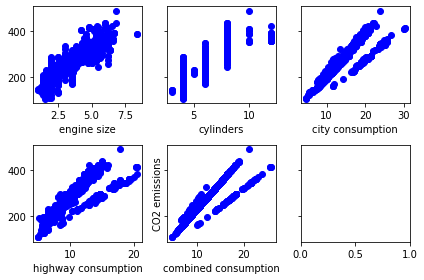

In [27]:
fig, axs = plt.subplots(2, 3, tight_layout=True, sharey=True)
plt.subplot(231)
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'], color='blue')
plt.xlabel('engine size')
plt.subplot(232)
plt.scatter(cdf['CYLINDERS'], cdf['CO2EMISSIONS'], color='blue')
plt.xlabel('cylinders')
plt.subplot(233)
plt.scatter(cdf['FUELCONSUMPTION_CITY'], cdf['CO2EMISSIONS'], color='blue')
plt.xlabel('city consumption')
plt.subplot(234)
plt.scatter(cdf['FUELCONSUMPTION_HWY'], cdf['CO2EMISSIONS'], color='blue')
plt.xlabel('highway consumption')
plt.subplot(235)
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf['CO2EMISSIONS'], color='blue')
plt.xlabel('combined consumption')
plt.ylabel('CO2 emissions')

plt.show()

In [50]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_set[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train_set['CO2EMISSIONS'])
regr.fit(train_x, train_y)
print('coef is ', regr.coef_)
print('intercept is, ', regr.intercept_)

coef is  [11.73524194  6.98860654  9.75369379]
intercept is,  63.95715283994946


In [52]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test_set[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test_set['CO2EMISSIONS'])
eval_y = regr.predict(test_x)
R2 = r2_score(test_y, eval_y)
print('R2 score is: %.2f' % R2)


R2 score is: 0.86
